In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

issues_file = open('issue_analysis.json')
issues_data = json.load(issues_file)
issues_file.close()

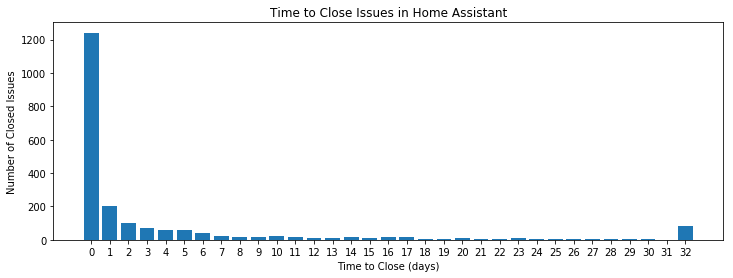

In [25]:
issues_keys = [int(key) for key in issues_data.keys()]
issues_keys.sort()

values = []
for item in issues_keys:
    values.append(issues_data[str(item)])

fig, ax = plt.subplots()
plt.bar(issues_keys, values, width=0.8)
plt.xticks(np.arange(min(issues_keys), max(issues_keys)+1, 1.0))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12.0
fig_size[1] = 4.0
plt.rcParams["figure.figsize"] = fig_size
ax.set_ylabel("Number of Closed Issues")
ax.set_xlabel("Time to Close (days)")

ax.set_title("Time to Close Issues in Home Assistant")
plt.savefig('issues_resolution.png', bbox_inches='tight')
plt.show()


In [26]:
# let's do some work on the commit analysis
commit_file = open('commit_analysis.json')
commit_data = json.load(commit_file)
commit_file.close()

In [49]:
# for each year pick only authors who have more than 100 commits
years = list(commit_data.keys())
filtered_by_year = {}
year_count = {}

author_count = {}

for year, year_commits in commit_data.items():
    top = []
    for author, commit_count in year_commits.items():
        if commit_count < 20:
            continue
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
        
        top.append(author)
        
        if int(year) == 2019:
            continue
            
        if author in author_count:
            author_count[author] += commit_count
        else:
            author_count[author] = commit_count
            
    filtered_by_year[year] = set(top)

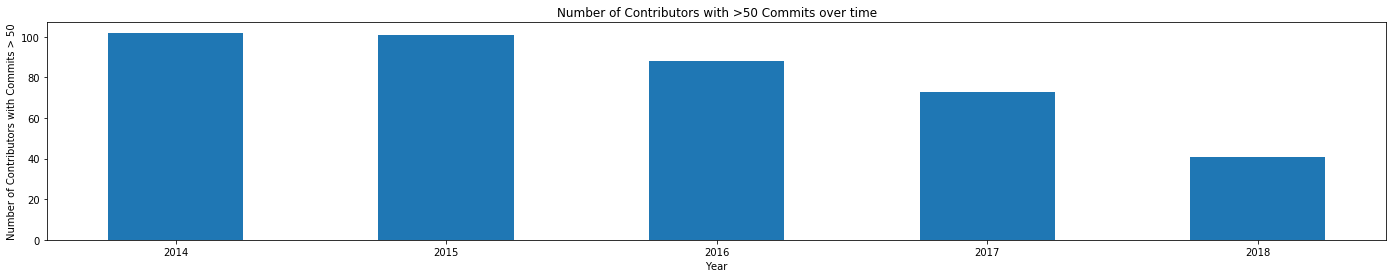

In [50]:
considered_years = years[:-1]
considered_years.sort()
values = [year_count[year] for year in considered_years]
fig, ax = plt.subplots()
plt.bar(considered_years, values, width=0.5)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4.0
plt.rcParams["figure.figsize"] = fig_size
ax.set_ylabel("Number of Contributors with Commits > 50")
ax.set_xlabel("Year")

ax.set_title("Number of Contributors with >50 Commits over time")
plt.savefig('truck_factor1.png', bbox_inches='tight')
plt.show()

In [51]:
# check who has been consistent
consistence = None
for year, top in filtered_by_year.items():
    if consistence is None:
        consistence = top
    else:
        consistence = consistence & top

consistence = list(consistence)
consistence.sort()

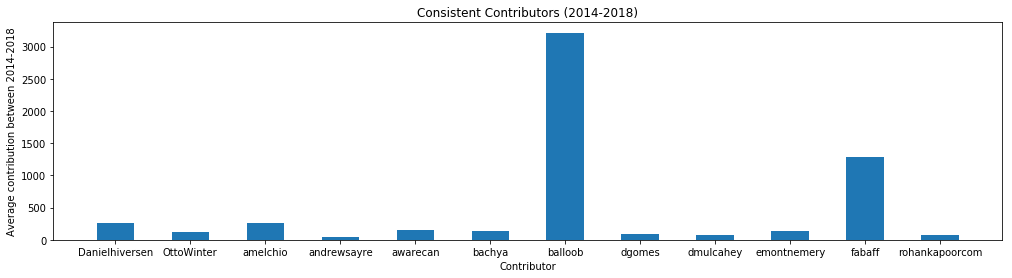

In [57]:
import math
num_years = len(considered_years)
avg_count = []
for author in consistence:
    avg_count.append(math.ceil(author_count[author]/num_years))
    
fig, ax = plt.subplots()
xrange =range(0, len(consistence))
plt.bar(xrange, avg_count, width=0.5)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 4.0
plt.rcParams["figure.figsize"] = fig_size
ax.set_ylabel("Average contribution between 2014-2018")
ax.set_xlabel("Contributor")

plt.xticks(xrange, consistence)
ax.set_title("Consistent Contributors (2014-2018)")
plt.savefig('truck_factor2.png', bbox_inches='tight')
plt.show()